# <div><h1 style="text-align: center; margin-bottom: 10px;  color: #0f0f0f; padding: 10px; border-radius: 8px; text-align: center;background-color:#F30700"> ZOMATO FOOD ORDER ANALYSIS </h1></div>


# 
<div style="text-align: right; color:#f13939;">
    <div style="margin-right: 100px;">
    <span style="text-align: right"><h1>Team members:-</h1></div>
    <h2 style="margin-right: 10px;" >Borra Vasavi </h2>
    <h2 style="margin-right: 10px;" >Hasmitha D K</h2>
    </span>
</div>

In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

# Step 1: Database connection
connection = mysql.connector.connect(
    host='localhost',       
    user='root',            
    password='12345678',    
    database='zomatodb',
    port=3306  # Use an integer, not a string
)

cursor = connection.cursor()

# Step 2: Load dataset
file_path = r"C:\Users\vasavi\OneDrive\Desktop\SPRINT 2\Zomato_Food_Order_Analysis.csv"
data = pd.read_csv(file_path)

# Convert 'Order_Date' to YYYY-MM-DD format
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

# Debug: Check dataset
#print(data.head())
#print(data.columns)

# Step 3: Insert data into MySQL
insert_query = """
INSERT INTO ZomatoOrders 
(Order_ID, Restaurant_Name, Cuisine, Order_Date, Order_Time, Delivery_Time_Minutes, Order_Value, Payment_Method, Customer_Rating, City)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

try:
    for index, row in data.iterrows():
        cursor.execute(insert_query, (
            row['Order_ID'],               # Match column name exactly
            row['Restaurant_Name'],        # Match column name exactly
            row['Cuisine'], 
            row['Order_Date'], 
            row['Order_Time'], 
            row['Delivery_Time_Minutes'], 
            row['Order_Value'],        # Match column name exactly
            row['Payment_Method'], 
            row['Customer_Rating'], 
            row['City']               # Match column name exactly
        ))

        # Optional: Commit in batches for performance
        if index % 5 == 0:
            connection.commit()

    # Final commit
    connection.commit()
    print(f"{len(data)} rows inserted successfully.")

except Error as e:
    print("Database Error:", e)

except Exception as ex:
    print("General Error:", ex)

finally:
    cursor.close()
    connection.close()


2000 rows inserted successfully.


# EDA

In [4]:
data

,Order_ID,Restaurant_Name,Cuisine,Order_Date,Order_Time,Delivery_Time_Minutes,Order_Value,Payment_Method,Customer_Rating,City
0,ORD0001,Curry Delight,Indian,2022-01-01,10:45,53,758.05,Wallet,4.4,Hyderabad
1,ORD0002,Spice Villa,Indian,2022-01-01,11:01,57,1350.44,Debit Card,3.3,Kolkata
2,ORD0003,Pasta Paradise,Indian,2022-01-02,14:23,41,1004.29,Wallet,3.2,Chennai
3,ORD0004,Pizza Plaza,Japanese,2022-01-02,21:55,22,1126.21,Debit Card,2.7,Chennai
4,ORD0005,Curry Delight,Mexican,2022-01-03,22:36,36,158.98,UPI,4.8,Bangalore
...,...,...,...,...,...,...,...,...,...,...
1995,ORD1996,Pizza Plaza,Mexican,2024-10-07,13:35,26,1253.55,Wallet,1.4,Chennai
1996,ORD1997,Sushi World,Mexican,2024-10-08,18:33,48,881.78,UPI,2.5,Mumbai
1997,ORD1998,Spice Villa,Japanese,2024-10-08,21:16,28,1556.71,Cash,4.4,Kolkata
1998,ORD1999,Burger Town,Italian,2024-10-09,19:16,45,1038.77,Wallet,1.8,Bangalore


In [6]:
# Display first 5 rows
data.head()


,Order_ID,Restaurant_Name,Cuisine,Order_Date,Order_Time,Delivery_Time_Minutes,Order_Value,Payment_Method,Customer_Rating,City
0,ORD0001,Curry Delight,Indian,2022-01-01,10:45,53,758.05,Wallet,4.4,Hyderabad
1,ORD0002,Spice Villa,Indian,2022-01-01,11:01,57,1350.44,Debit Card,3.3,Kolkata
2,ORD0003,Pasta Paradise,Indian,2022-01-02,14:23,41,1004.29,Wallet,3.2,Chennai
3,ORD0004,Pizza Plaza,Japanese,2022-01-02,21:55,22,1126.21,Debit Card,2.7,Chennai
4,ORD0005,Curry Delight,Mexican,2022-01-03,22:36,36,158.98,UPI,4.8,Bangalore


In [7]:
# Display last 5 rows
data.tail()

,Order_ID,Restaurant_Name,Cuisine,Order_Date,Order_Time,Delivery_Time_Minutes,Order_Value,Payment_Method,Customer_Rating,City
1995,ORD1996,Pizza Plaza,Mexican,2024-10-07,13:35,26,1253.55,Wallet,1.4,Chennai
1996,ORD1997,Sushi World,Mexican,2024-10-08,18:33,48,881.78,UPI,2.5,Mumbai
1997,ORD1998,Spice Villa,Japanese,2024-10-08,21:16,28,1556.71,Cash,4.4,Kolkata
1998,ORD1999,Burger Town,Italian,2024-10-09,19:16,45,1038.77,Wallet,1.8,Bangalore
1999,ORD2000,Burger Town,Chinese,2024-10-10,22:37,15,1249.61,Debit Card,1.7,Bangalore


In [8]:
# The number of rows and columns
data.shape

(2000, 10)

In [9]:
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Number of Rows: 2000
Number of Columns: 10


In [10]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order_ID               2000 non-null   object 
 1   Restaurant_Name        2000 non-null   object 
 2   Cuisine                2000 non-null   object 
 3   Order_Date             2000 non-null   object 
 4   Order_Time             2000 non-null   object 
 5   Delivery_Time_Minutes  2000 non-null   int64  
 6   Order_Value            2000 non-null   float64
 7   Payment_Method         2000 non-null   object 
 8   Customer_Rating        2000 non-null   float64
 9   City                   2000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [11]:
# Checking for NULL values (Boolean values)
data.isnull()

,Order_ID,Restaurant_Name,Cuisine,Order_Date,Order_Time,Delivery_Time_Minutes,Order_Value,Payment_Method,Customer_Rating,City
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Order_ID                 0
Restaurant_Name          0
Cuisine                  0
Order_Date               0
Order_Time               0
Delivery_Time_Minutes    0
Order_Value              0
Payment_Method           0
Customer_Rating          0
City                     0
dtype: int64

In [13]:
# Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [14]:
# Basic statistics for numeric columns
print(data.describe())


       Delivery_Time_Minutes  Order_Value  Customer_Rating
count            2000.000000  2000.000000      2000.000000
mean               37.286000  1045.328480         2.977150
std                13.280677   554.365671         1.159506
min                15.000000   102.150000         1.000000
25%                26.000000   574.795000         2.000000
50%                37.000000  1042.280000         3.000000
75%                49.000000  1525.695000         4.000000
max                60.000000  1999.790000         5.000000


In [17]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%Y-%m-%d')
data['Order_Time'] = pd.to_datetime(data['Order_Time'], format='%H:%M').dt.time


# DATA ANALYSIS

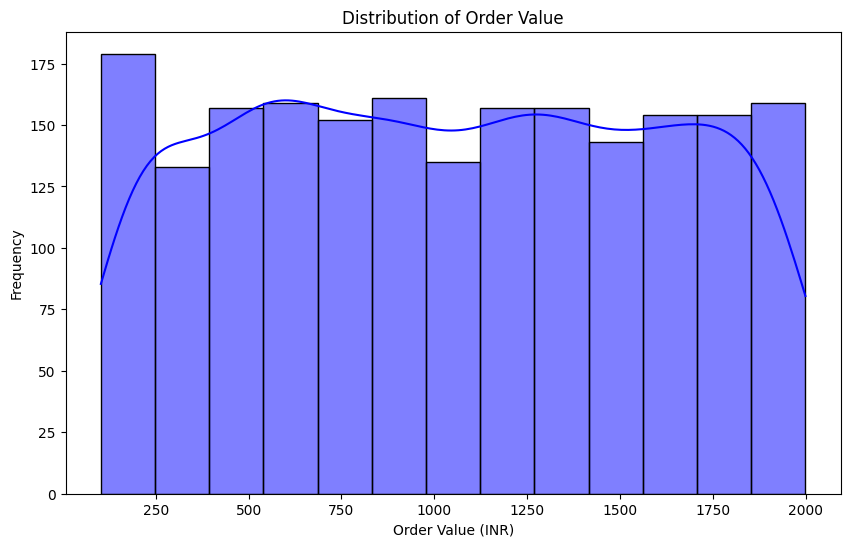

In [19]:
#Distribution of Key Columns


#Order Value

plt.figure(figsize=(10, 6))
sns.histplot(data['Order_Value'], kde=True, color='blue')
plt.title('Distribution of Order Value')
plt.xlabel('Order Value (INR)')
plt.ylabel('Frequency')
plt.show()


C:\Users\vasavi\AppData\Local\Temp\ipykernel_11444\1565768919.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Rating', data=filtered_data, palette='viridis', order=top_ratings)


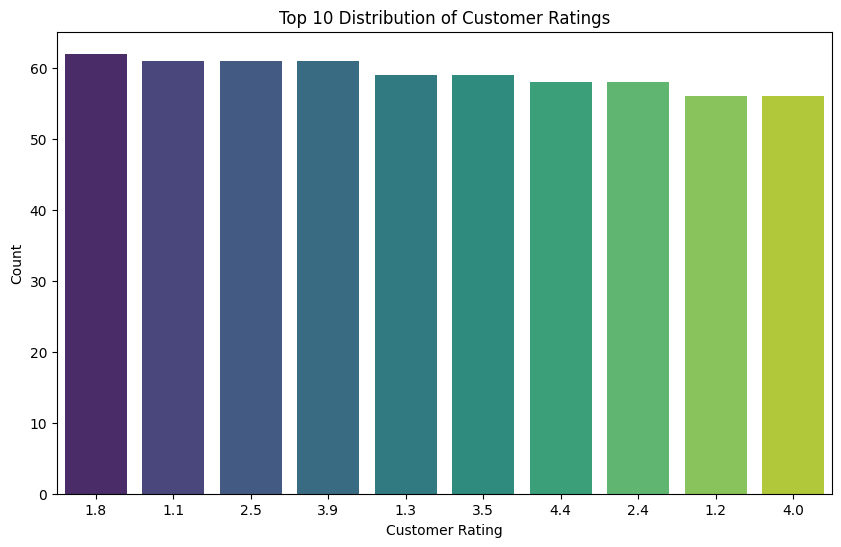

In [26]:
# Get the top 10 most frequent Customer Ratings
top_ratings = data['Customer_Rating'].value_counts().head(10).index

# Filter the dataset for only the top 10 ratings
filtered_data = data[data['Customer_Rating'].isin(top_ratings)]

# Plot the distribution of the top 10 Customer Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Rating', data=filtered_data, palette='viridis', order=top_ratings)
plt.title('Top 10 Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.show()


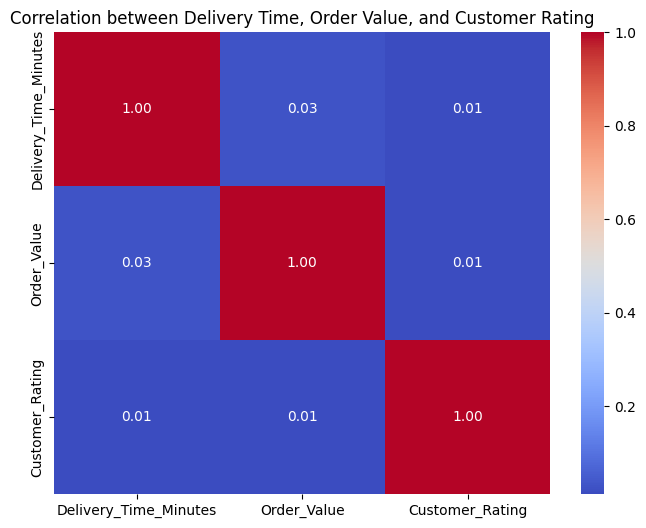

In [21]:
#Correlation Between Numerical Columns

# Correlation heatmap for numerical columns
correlation = data[['Delivery_Time_Minutes', 'Order_Value', 'Customer_Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Delivery Time, Order Value, and Customer Rating')
plt.show()


C:\Users\vasavi\AppData\Local\Temp\ipykernel_11444\715392375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cuisine', data=data, palette='Set2', order=data['Cuisine'].value_counts().index)


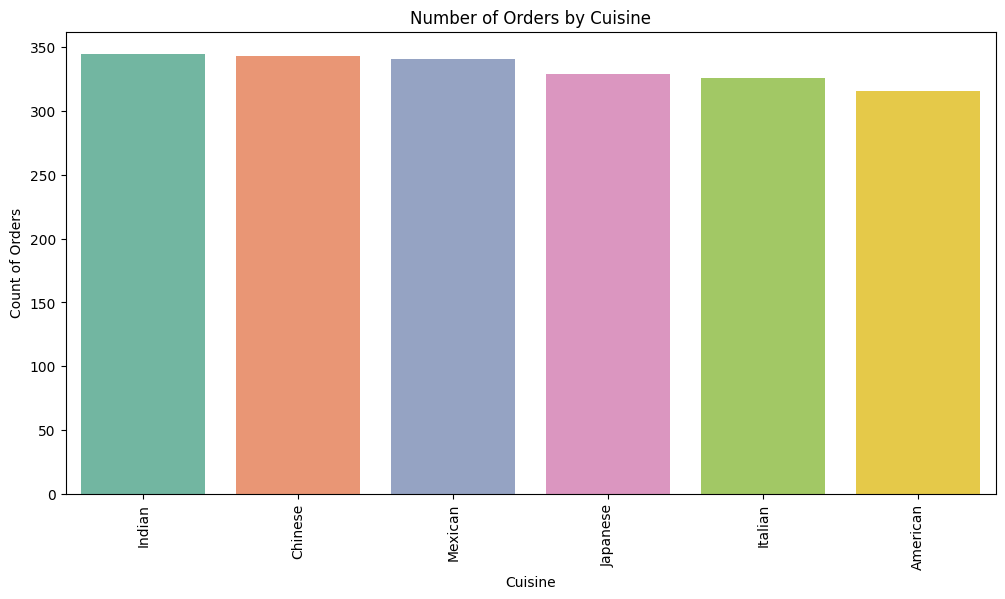

In [ ]:
# Count of orders by cuisine type
plt.figure(figsize=(12, 6))
sns.countplot(x='Cuisine', data=data, palette='Set2', 
              order=data['Cuisine'].value_counts().index)
plt.title('Number of Orders by Cuisine')
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Count of Orders')
plt.show()


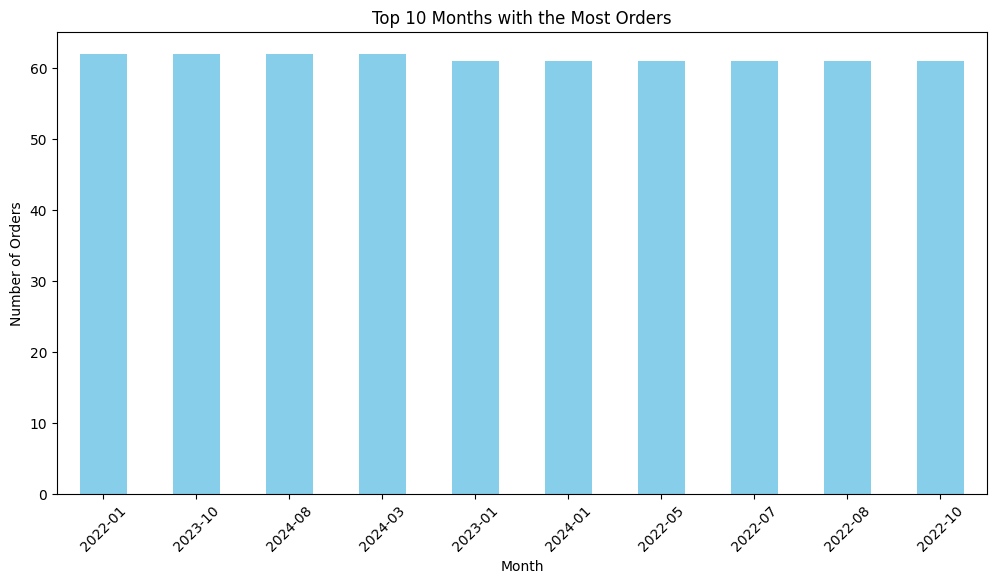

In [ ]:
# Extract year-month from 'Order_Date' for time-based analysis
data['Order_Year_Month'] = data['Order_Date'].dt.to_period('M')

# Count orders per month
monthly_orders = data['Order_Year_Month'].value_counts().
sort_values(ascending=False).head(10)

# Plot the top 10 months with the most orders
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title('Top 10 Months with the Most Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


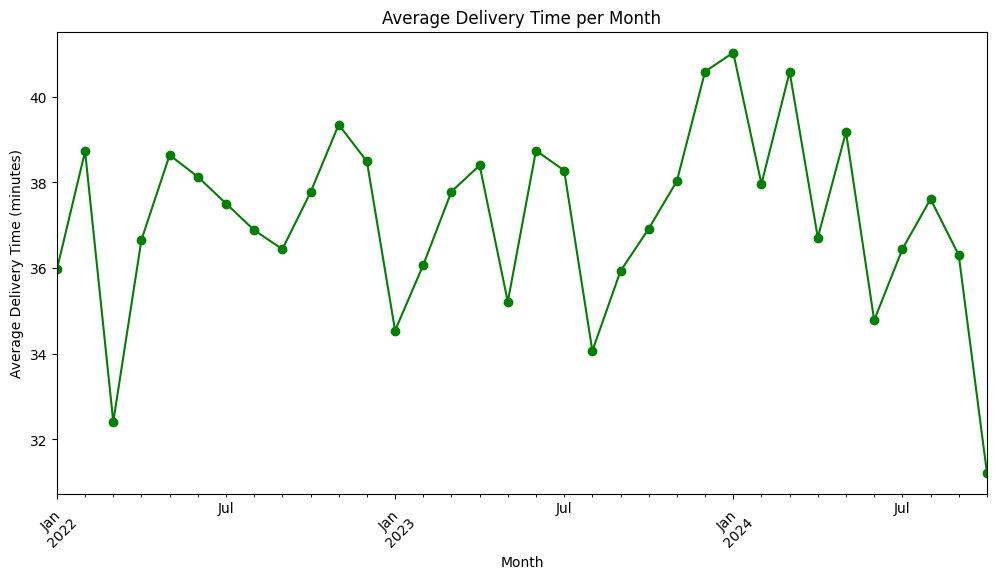

In [ ]:
# Calculate average delivery time per month
avg_delivery_time = data.groupby
('Order_Year_Month')
['Delivery_Time_Minutes'].mean()

plt.figure(figsize=(12, 6))
avg_delivery_time.plot(kind='line', 
                marker='o', color='green')
plt.title('Average Delivery Time per Month')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()


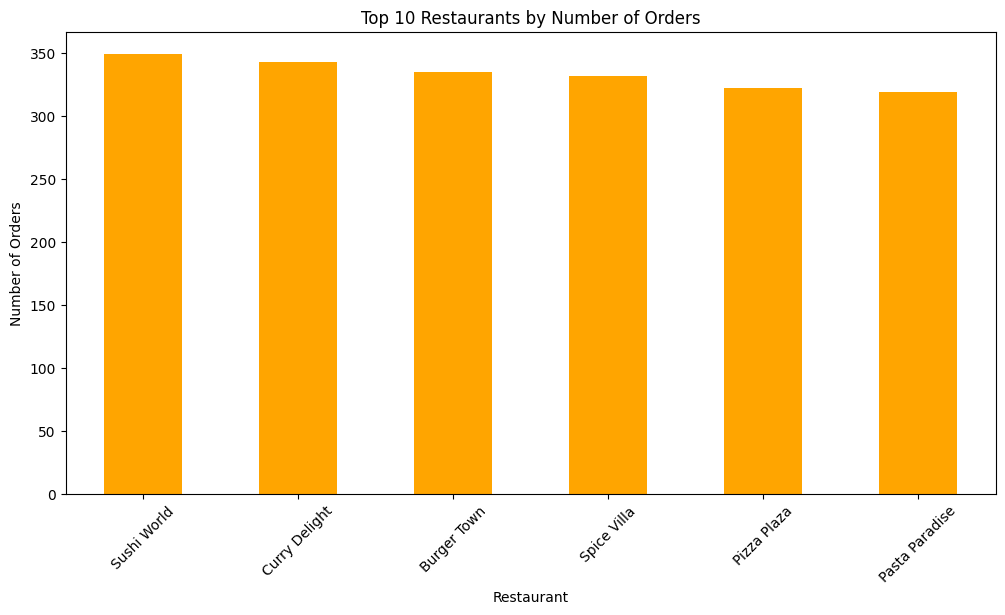

In [ ]:
top_restaurants = data['Restaurant_Name']
.value_counts().head(10)
plt.figure(figsize=(12, 6))
top_restaurants.plot(kind='bar',
                 color='orange')
plt.title('Top 10 Restaurants
           by Number of Orders')
plt.xlabel('Restaurant')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()



Revenue by Cuisine:
 Cuisine
Chinese     370935.22
Indian      366978.84
Mexican     350900.65
Italian     341422.01
Japanese    336257.24
American    324163.00
Name: Order_Value, dtype: float64


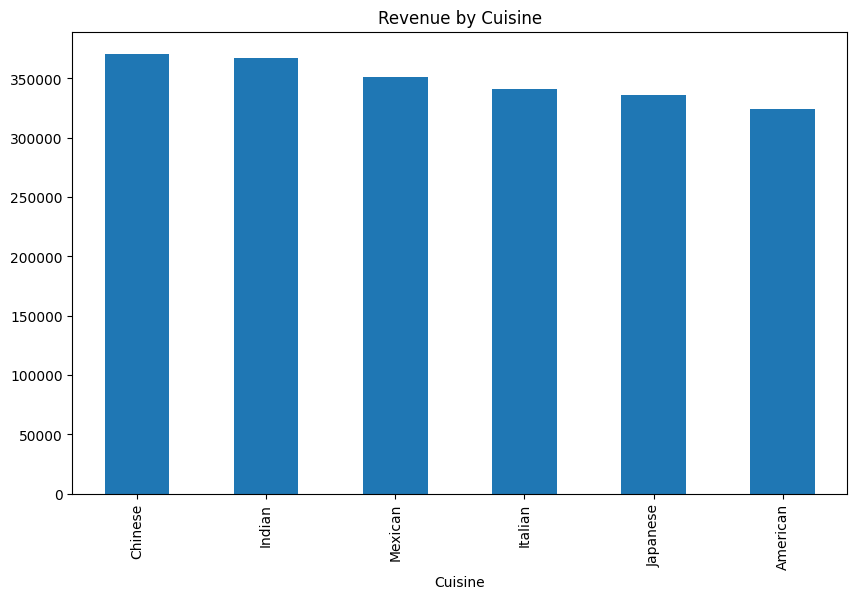

In [ ]:
# Revenue by Cuisine
cuisine_revenue = data.groupby('Cuisine')
['Order_Value'].sum().sort_values(ascending=False)
print("\nRevenue by Cuisine:\n", cuisine_revenue)
cuisine_revenue.plot(kind='bar', 
    title='Revenue by Cuisine', figsize=(10, 6))
plt.show()


Average Delivery Time by City:
 City
Chennai      36.069364
Bangalore    37.055046
Delhi        37.104938
Kolkata      37.340625
Hyderabad    38.047059
Mumbai       38.099125
Name: Delivery_Time_Minutes, dtype: float64


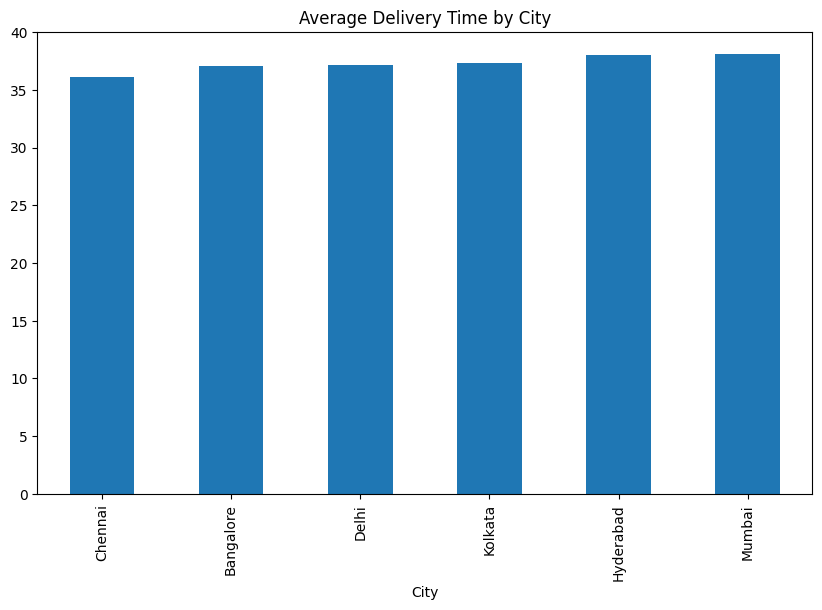

In [ ]:
# Average Delivery Time by City
city_delivery = data.groupby('City')
['Delivery_Time_Minutes'].mean().sort_values()
print("\nAverage Delivery Time by City:\n", 
      city_delivery)
city_delivery.plot(kind='bar', 
    title='Average Delivery Time by City',
      figsize=(10, 6))
plt.show()